<a href="https://colab.research.google.com/github/Ayush-David/MachineLearning/blob/main/machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
fmnist=tf.keras.datasets.fashion_mnist


In [ ]:
(training_images,training_lables),(testing_images,testing_lables)=fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
index=8
np.set_printoptions(linewidth=320)

Label:5

IMAGE PIXELS ARRAY: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   3   1   0   0   1   1   0   0   0   0  58   0  39   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   3   0   0   0   0   0   0   0  64 109 146 192 193   7   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0  94  38  99 209 183 229 192 142  48   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0  41  45 158 146 164 114  51   1  53 105  42  36   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  10  68  44  30  59 172 146   0  22   0  13 103 111 103   0   0]
 [  0   0   0   0   0   0   0   0   0   3   1   0  22  61  88 152 255  71   0   0   0   0  35  85 112 201  44   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0 

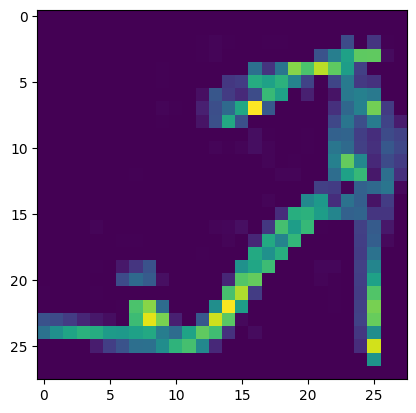

In [ ]:
print(f'Label:{training_lables[index]}')
print(f'\nIMAGE PIXELS ARRAY: \n{training_images[index]}')
plt.imshow(training_images[index])

In [ ]:
training_images=training_images/255.0
testing_images=testing_images/255.0

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images,training_lables, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.5031 - accuracy: 0.8237
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3770 - accuracy: 0.8630
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3350 - accuracy: 0.8787
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3109 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2916 - accuracy: 0.8931


In [ ]:
model.evaluate(testing_images,testing_lables)

313/313 [==============================] - 1s 2ms/step - loss: 0.3583 - accuracy: 0.8734


[0.3583289682865143, 0.8733999729156494]

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.4):
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=10,callbacks=[callbacks])

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4650
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.3541
Loss is lower than 0.4 so cancelling training!
313/313 [==============================] - 1s 2ms/step
[2.01927523e-05 4.85906548e-06 1.63284349e-05 6.01673901e-06
 2.12999494e-05 1.00312315e-01 7.81000417e-05 9.91221815e-02
 1.98980706e-05 8.00398707e-01]
9
